In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('IRIS.csv')

# Explore the data
print("First few rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
from sklearn.model_selection import train_test_split
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

# Split the dataset into training and testing sets (using stratification to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = clf.predict(X_test)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45

Accuracy Score: 0.8888888888888888


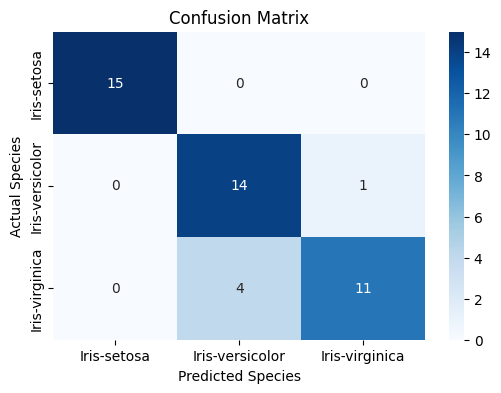

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy)

# Create and display a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix')
plt.show()


## Feature Importance Analysis

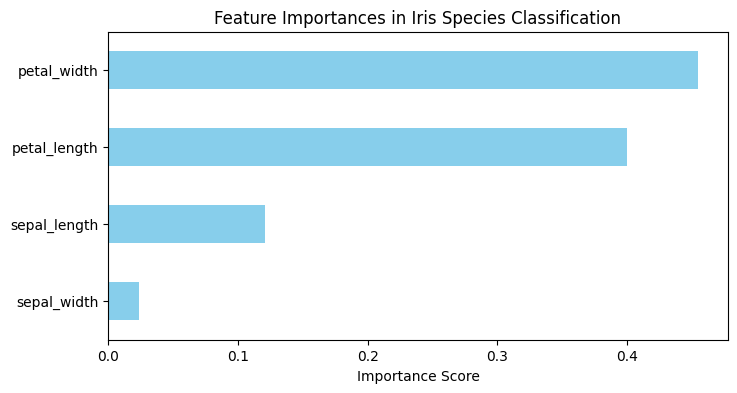

In [14]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True, inplace=True)
plt.figure(figsize=(8, 4))
feat_importances.plot(kind='barh', color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances in Iris Species Classification')
plt.show()